## IMPORT LIBRARY

In [118]:
#import library yang digunakan
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

## IMPORT DATASET

In [119]:
#import dataset
df = pd.read_csv('Kuisioner.csv')
df.head()

,Timestamp,Nama Mahasiswa,"Umur Mahasiswa (angka, ex: 20)",Jenis Kelamin Mahasiswa,Asal Instansi Mahasiswa,Apakah anda menggunakan media sosial secara aktif?,Berapa durasi waktu Anda dalam menggunakan media sosial tiap harinya?,Apa Media Sosial yang sering Anda gunakan?,Apakah Anda merasa penggunaan media sosial berpengaruh pada kesejahteraan mental Anda?,Apakah anda merasa berbagai konten dalam media sosial dapat berguna untuk hidup Anda?,Apakah anda merasa lebih bahagia ketika Aktif menggunakan media sosial?,Apakah Anda pernah merasa cemas atau stress setelah melihat konten di media sosial?,Apa konten yang sering membuat Anda Stress?,Apakah anda setuju kegiatan dan aktifitas fisik dapat mengurangi rasa stress?,"Berapa durasi tidur Anda tiap harinya? (jam, ex:9)","Berapa rata-rata durasi aktifitas real-life Anda tiap harinya(tidak menggunakan media sosial)? (jam, ex: 3)"
0,30/09/2023 12:15:34,sadat,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Tiktok",Berpengaruh,4,2,Ya,akhirat,Ya,4,8
1,30/09/2023 12:18:10,Mochamad Afifuddin,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,Instagram,Berpengaruh,4,4,Ya,Politik,Ya,5,7
2,30/09/2023 17:53:57,Riry,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Youtube",Berpengaruh,4,3,Ya,Iklan,Ya,6,8
3,30/09/2023 18:30:34,Bulan,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,Tiktok,Berpengaruh,5,5,Ya,Pendidikan,Ya,7,6
4,30/09/2023 23:07:06,Valen,20,Perempuan,Universitas Airlangga,Ya,> 8 jam,"Instagram, Tiktok",Berpengaruh,5,5,Tidak,Pendidikan,Ya,6,6


## RENAME KOLOM DATASET

In [120]:
# Mengubah nama kolom agar tidak terlalu panjang
df.rename(columns = {'Nama Mahasiswa':'Nama',
                     'Umur Mahasiswa (angka, ex: 20)' : 'Umur', 
                     'Jenis Kelamin Mahasiswa' : 'Jenis Kelamin',
                     'Asal Instansi Mahasiswa' : 'Instansi', 
                     'Apakah anda menggunakan media sosial secara aktif?' : 'Aktif Sosial Media',
                     'Berapa durasi waktu Anda dalam menggunakan media sosial tiap harinya?' : 'Durasi Sosmed',
                     'Apa Media Sosial yang sering Anda gunakan?' : 'Medsos Digunakan',
                     'Apakah Anda merasa penggunaan media sosial berpengaruh pada kesejahteraan mental Anda? ' : 'Pengaruh Medsos Terhadap Mental',
                     'Apakah anda merasa berbagai konten dalam media sosial dapat berguna untuk hidup Anda?' : 'Pengaruh Konten Medsos Untuk Hidup',
                     'Apakah anda merasa lebih bahagia ketika Aktif menggunakan media sosial?' : 'Tingkat Kebahagiaan Aktif Medsos',
                     'Apakah Anda pernah merasa cemas atau stress setelah melihat konten di media sosial?' : 'Kecemasan Terhadap Konten Medsos',
                     'Apa konten yang sering membuat Anda Stress?' : 'Konten Membuat Stress',
                     'Apakah anda setuju kegiatan dan aktifitas fisik dapat mengurangi rasa stress?' : 'Aktifitas Fisik Mengurangi Stress',
                     'Berapa durasi tidur Anda tiap harinya? (jam, ex:9)' : 'Durasi Tidur',
                     'Berapa rata-rata durasi aktifitas real-life Anda tiap harinya(tidak menggunakan media sosial)? (jam, ex: 3)' : 'Durasi Tanpa Medsos',
                    },
                    
                    inplace = True)

df

,Timestamp,Nama,Umur,Jenis Kelamin,Instansi,Aktif Sosial Media,Durasi Sosmed,Medsos Digunakan,Pengaruh Medsos Terhadap Mental,Pengaruh Konten Medsos Untuk Hidup,Tingkat Kebahagiaan Aktif Medsos,Kecemasan Terhadap Konten Medsos,Konten Membuat Stress,Aktifitas Fisik Mengurangi Stress,Durasi Tidur,Durasi Tanpa Medsos
0,30/09/2023 12:15:34,sadat,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Tiktok",Berpengaruh,4,2,Ya,akhirat,Ya,4,8
1,30/09/2023 12:18:10,Mochamad Afifuddin,19,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,Instagram,Berpengaruh,4,4,Ya,Politik,Ya,5,7
2,30/09/2023 17:53:57,Riry,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, Youtube",Berpengaruh,4,3,Ya,Iklan,Ya,6,8
3,30/09/2023 18:30:34,Bulan,19,Perempuan,Universitas Airlangga,Ya,1 - 4 jam,Tiktok,Berpengaruh,5,5,Ya,Pendidikan,Ya,7,6
4,30/09/2023 23:07:06,Valen,20,Perempuan,Universitas Airlangga,Ya,> 8 jam,"Instagram, Tiktok",Berpengaruh,5,5,Tidak,Pendidikan,Ya,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,11/10/2023 21:28,Daffa,20,Laki - Laki,Universitas Airlangga,Ya,4 - 8 jam,"Instagram, X / Twitter",Tidak Berpengaruh,3,3,Ya,Entertainment/Hiburan,Ya,4,5
71,11/10/2023 21:30,Naufal,21,Laki - Laki,Universitas Airlangga,Ya,1 - 4 jam,"Instagram, X / Twitter",Berpengaruh,5,4,Ya,"Politik, Kesehatan",Ya,4,6
72,11/10/2023 21:44,Satria Pamungkas,20,Laki - Laki,Universitas Airlangga,Tidak,1 - 4 jam,"Instagram, Tiktok",Tidak Berpengaruh,4,3,Tidak,Tidak Stress,Ya,5,15
73,11/10/2023 22:01,Muhammad Fauzan Ramadhan,19,Laki - Laki,Universitas Airlangga,Ya,4 - 8 jam,"Instagram, Tiktok",Berpengaruh,4,3,Ya,Politik,Tidak,6,7


## DROP KOLOM YANG TIDAK DIPERLUKAN

In [121]:
# drop kolom yang tidak diperlukan untuk pembuatan model
df.drop(df.columns[[0, 1,7,8,4,7,12]], axis=1, inplace=True)
df 

,Umur,Jenis Kelamin,Aktif Sosial Media,Durasi Sosmed,Pengaruh Konten Medsos Untuk Hidup,Tingkat Kebahagiaan Aktif Medsos,Kecemasan Terhadap Konten Medsos,Aktifitas Fisik Mengurangi Stress,Durasi Tidur,Durasi Tanpa Medsos
0,19,Laki - Laki,Ya,1 - 4 jam,4,2,Ya,Ya,4,8
1,19,Laki - Laki,Ya,1 - 4 jam,4,4,Ya,Ya,5,7
2,19,Perempuan,Ya,1 - 4 jam,4,3,Ya,Ya,6,8
3,19,Perempuan,Ya,1 - 4 jam,5,5,Ya,Ya,7,6
4,20,Perempuan,Ya,> 8 jam,5,5,Tidak,Ya,6,6
...,...,...,...,...,...,...,...,...,...,...
70,20,Laki - Laki,Ya,4 - 8 jam,3,3,Ya,Ya,4,5
71,21,Laki - Laki,Ya,1 - 4 jam,5,4,Ya,Ya,4,6
72,20,Laki - Laki,Tidak,1 - 4 jam,4,3,Tidak,Ya,5,15
73,19,Laki - Laki,Ya,4 - 8 jam,4,3,Ya,Tidak,6,7


## REPLACE NILAI KATEGORIKAL MENJADI NUMERIKAL

In [122]:
# replacing values
df['Jenis Kelamin'].replace(['Laki - Laki', 'Perempuan'],
                        [0, 1], inplace=True)
df['Aktif Sosial Media'].replace(['Ya', 'Tidak'],
                        [1, 0], inplace=True)

df['Durasi Sosmed'].replace(['1 - 4 jam', '4 - 8 jam', '> 8 jam'],
                        [0, 1, 2], inplace=True)
df['Kecemasan Terhadap Konten Medsos'].replace(['Ya', 'Tidak'],
                        [1, 0], inplace=True)
df['Aktifitas Fisik Mengurangi Stress'].replace(['Ya', 'Tidak'],
                        [1, 0], inplace=True)


df

,Umur,Jenis Kelamin,Aktif Sosial Media,Durasi Sosmed,Pengaruh Konten Medsos Untuk Hidup,Tingkat Kebahagiaan Aktif Medsos,Kecemasan Terhadap Konten Medsos,Aktifitas Fisik Mengurangi Stress,Durasi Tidur,Durasi Tanpa Medsos
0,19,0,1,0,4,2,1,1,4,8
1,19,0,1,0,4,4,1,1,5,7
2,19,1,1,0,4,3,1,1,6,8
3,19,1,1,0,5,5,1,1,7,6
4,20,1,1,2,5,5,0,1,6,6
...,...,...,...,...,...,...,...,...,...,...
70,20,0,1,1,3,3,1,1,4,5
71,21,0,1,0,5,4,1,1,4,6
72,20,0,0,0,4,3,0,1,5,15
73,19,0,1,1,4,3,1,0,6,7


## EXPORT DATASE HASIL REPLACE MENAJDI FILE CSV

In [123]:
df.to_csv('data_replace.csv', index=False)

## PREPROCESSING 

In [124]:
#Deteksi Missing Value
df.isna()

,Umur,Jenis Kelamin,Aktif Sosial Media,Durasi Sosmed,Pengaruh Konten Medsos Untuk Hidup,Tingkat Kebahagiaan Aktif Medsos,Kecemasan Terhadap Konten Medsos,Aktifitas Fisik Mengurangi Stress,Durasi Tidur,Durasi Tanpa Medsos
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
70,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False


In [125]:
# Penanganan missing value dengan memberikan nilai setelahnya
df.fillna(method ='bfill') 

,Umur,Jenis Kelamin,Aktif Sosial Media,Durasi Sosmed,Pengaruh Konten Medsos Untuk Hidup,Tingkat Kebahagiaan Aktif Medsos,Kecemasan Terhadap Konten Medsos,Aktifitas Fisik Mengurangi Stress,Durasi Tidur,Durasi Tanpa Medsos
0,19,0,1,0,4,2,1,1,4,8
1,19,0,1,0,4,4,1,1,5,7
2,19,1,1,0,4,3,1,1,6,8
3,19,1,1,0,5,5,1,1,7,6
4,20,1,1,2,5,5,0,1,6,6
...,...,...,...,...,...,...,...,...,...,...
70,20,0,1,1,3,3,1,1,4,5
71,21,0,1,0,5,4,1,1,4,6
72,20,0,0,0,4,3,0,1,5,15
73,19,0,1,1,4,3,1,0,6,7


In [126]:
# CEK OUTLIER
df.boxplot()
plt.show()

AssertionError: 5

In [ ]:
# Deteksi Outlier
print('===== deteksi outlier =====')
# Function yang dapat mendeteksi outlier dengan Quartiles
def detOutlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outlier = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    return outlier

# Deteksi outlier pada variabel input
inOutlierShow = detOutlier(df)
if not inOutlierShow.empty:
    print("Berikut outlier nya")
    print(inOutlierShow)
else:
    print("Tidak ada outlier")
    

===== deteksi outlier =====
Berikut outlier nya
    Umur  Jenis Kelamin  Aktif Sosial Media  Durasi Sosmed  \
0   19.0            NaN                 NaN            NaN   
1   19.0            NaN                 NaN            NaN   
2   19.0            NaN                 NaN            NaN   
3   19.0            NaN                 NaN            NaN   
4    NaN            NaN                 NaN            NaN   
..   ...            ...                 ...            ...   
70   NaN            NaN                 NaN            NaN   
71   NaN            NaN                 NaN            NaN   
72   NaN            NaN                 0.0            NaN   
73  19.0            NaN                 NaN            NaN   
74   NaN            NaN                 NaN            NaN   

    Pengaruh Konten Medsos Untuk Hidup  Tingkat Kebahagiaan Aktif Medsos  \
0                                  NaN                               NaN   
1                                  NaN                 

In [ ]:
import pandas as pd

# Mengganti outlier pada variabel input dengan nilai mean
def replaceOutlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    mean = series[(series > lower_bound) & (series < upper_bound)].mean()
    series[series > upper_bound] = mean
    series[series < lower_bound] = mean
    return series

# Membuat dataframe untuk menampung hasil penggantian outlier
inDataReplacedOutliers = pd.DataFrame()

# melakukan looping pada setiap kolom
for col in df.columns:
    # Mengubah kolom menjadi numerik (mengabaikan data non-numeric)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # mengganti outlier dengan mean di setiap kolom
    colReplacedOutliers = replaceOutlier(df[col])    
    # menampung hasilnya
    inDataReplacedOutliers[col] = colReplacedOutliers
    
# menampilkan hasil penanganan outlier
print("SETELAH PENGGANTIAN OUTLIER")
inDataReplacedOutliers = df.fillna(0)
print(inDataReplacedOutliers)




SETELAH PENGGANTIAN OUTLIER
         Umur  Jenis Kelamin  Aktif Sosial Media  Durasi Sosmed  \
0   20.295082              0                 1.0              0   
1   20.295082              0                 1.0              0   
2   20.295082              1                 1.0              0   
3   20.295082              1                 1.0              0   
4   20.000000              1                 1.0              2   
..        ...            ...                 ...            ...   
70  20.000000              0                 1.0              1   
71  21.000000              0                 1.0              0   
72  20.000000              0                 0.0              0   
73  20.295082              0                 1.0              1   
74  20.000000              0                 1.0              0   

    Pengaruh Konten Medsos Untuk Hidup  Tingkat Kebahagiaan Aktif Medsos  \
0                                    4                               2.0   
1              

C:\Users\User\AppData\Local\Temp\ipykernel_29764\1626980430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = mean
C:\Users\User\AppData\Local\Temp\ipykernel_29764\1626980430.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = mean
C:\Users\User\AppData\Local\Temp\ipykernel_29764\1626980430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound]

## NORMALISASI

In [ ]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(inDataReplacedOutliers)
cleandata = scaler.transform(inDataReplacedOutliers)
print(cleandata)



[[0.29508197 0.         1.         0.         0.75       0.
  1.         1.         0.         0.57142857]
 [0.29508197 0.         1.         0.         0.75       0.66666667
  1.         1.         0.2        0.5       ]
 [0.29508197 1.         1.         0.         0.75       0.33333333
  1.         1.         0.4        0.57142857]
 [0.29508197 1.         1.         0.         1.         1.
  1.         1.         0.6        0.42857143]
 [0.         1.         1.         1.         1.         1.
  0.         1.         0.4        0.42857143]
 [0.         0.         1.         0.         0.75       0.33333333
  1.         1.         0.2        0.57142857]
 [0.29508197 0.         1.         0.5        1.         0.66666667
  1.         0.         0.4        0.57142857]
 [0.         0.         1.         0.         0.75       0.66666667
  1.         1.         0.4        0.64285714]
 [0.         1.         0.         0.5        0.5        0.66666667
  0.         1.         0.6        0

## STANDARISASI

In [ ]:
# # Standarisasi
# scaler = preprocessing.StandardScaler().fit(cleandata)
# scaler

## ELBOW METHOD

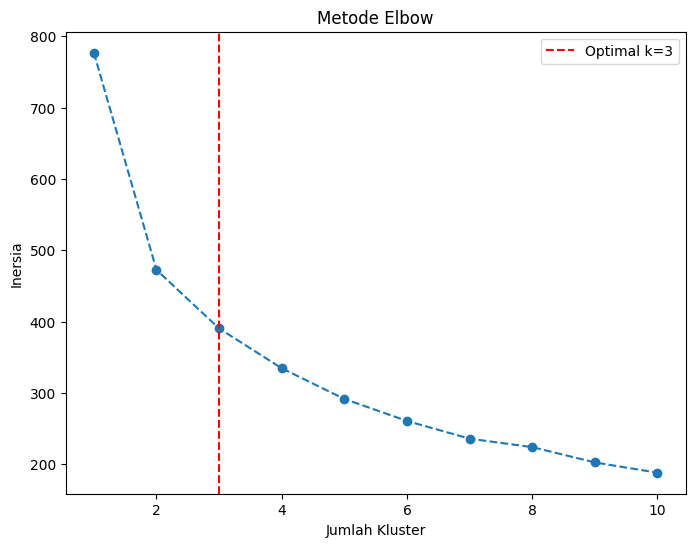

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih kolom yang akan digunakan untuk analisis klaster
df = inDataReplacedOutliers[[
  'Umur',
  'Jenis Kelamin',
  'Aktif Sosial Media',	
  'Durasi Sosmed',	
  'Pengaruh Konten Medsos Untuk Hidup',
  'Tingkat Kebahagiaan Aktif Medsos',	
  'Kecemasan Terhadap Konten Medsos',	
  'Aktifitas Fisik Mengurangi Stress',	
  'Durasi Tidur',	
  'Durasi Tanpa Medsos'
]]

# Inisialisasi list untuk inersia
inersia = []

# Coba jumlah kluster dari 1 hingga n (misalnya, 10) dan simpan inersia masing-masing
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    inersia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inersia, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')

# Menandai titik elbow dengan garis vertikal atau teks
optimal_k = 3 # Ganti nilai ini dengan nilai optimal yang Anda temukan
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k={optimal_k}')
# Atau, Anda dapat menambahkan teks di posisi optimal k
# plt.text(optimal_k + 0.1, max(inersia) - 500, f'Optimal k={optimal_k}', color='r')

plt.legend()
plt.show()


## K-MEANS CLUSTERING

In [ ]:

# Choose the number of clusters (K = 3)
K = 3

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(df[[
  'Umur',
  'Jenis Kelamin',
  'Aktif Sosial Media',	
  'Durasi Sosmed',	
  'Pengaruh Konten Medsos Untuk Hidup',
  'Tingkat Kebahagiaan Aktif Medsos',	
  'Kecemasan Terhadap Konten Medsos',	
  'Aktifitas Fisik Mengurangi Stress',	
  'Durasi Tidur',	
  'Durasi Tanpa Medsos']])  # Select numeric attributes only
cluster_labels = kmeans.labels_
df['Cluster_Labels'] = cluster_labels  # Menambahkan label cluster ke dfFrame

# Count the number of data points in each cluster
cluster_counts = df['Cluster_Labels'].value_counts()

# Display the counts
print(cluster_counts)



0    32
1    29
2    14
Name: Cluster_Labels, dtype: int64


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df

,Umur,Jenis Kelamin,Aktif Sosial Media,Durasi Sosmed,Pengaruh Konten Medsos Untuk Hidup,Tingkat Kebahagiaan Aktif Medsos,Kecemasan Terhadap Konten Medsos,Aktifitas Fisik Mengurangi Stress,Durasi Tidur,Durasi Tanpa Medsos,Cluster_Labels
0,20.295082,0,1.0,0,4,2.0,1,1.0,4,8.000000,0
1,20.295082,0,1.0,0,4,4.0,1,1.0,5,7.000000,0
2,20.295082,1,1.0,0,4,3.0,1,1.0,6,8.000000,0
3,20.295082,1,1.0,0,5,5.0,1,1.0,7,6.000000,0
4,20.000000,1,1.0,2,5,5.0,0,1.0,6,6.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
70,20.000000,0,1.0,1,3,3.0,1,1.0,4,5.000000,0
71,21.000000,0,1.0,0,5,4.0,1,1.0,4,6.000000,0
72,20.000000,0,0.0,0,4,3.0,0,1.0,5,5.954545,0
73,20.295082,0,1.0,1,4,3.0,1,0.0,6,7.000000,0


## EXPORT DATASET HASIL CLUSTERING

In [ ]:
# membuat dataframe hasil cluster
df.to_csv('result.csv', index=False)

## VISUASLISASI DATASET

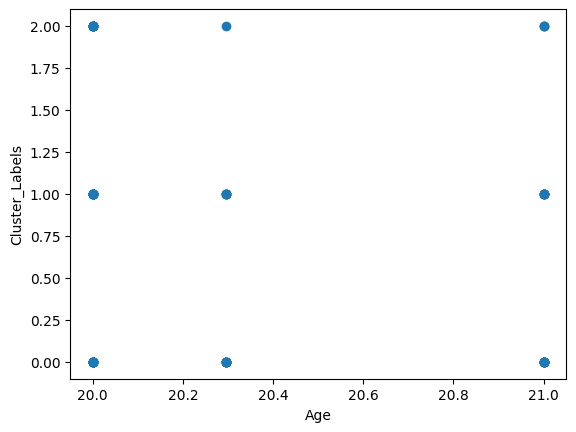

In [ ]:
# Visualisasi dengan scatterplot Age dengan Insulin
x = df['Umur']
y = df['Cluster_Labels']
plt.scatter(x, y,)
 
plt.xlabel("Age")
plt.ylabel("Cluster_Labels")
plt.show()


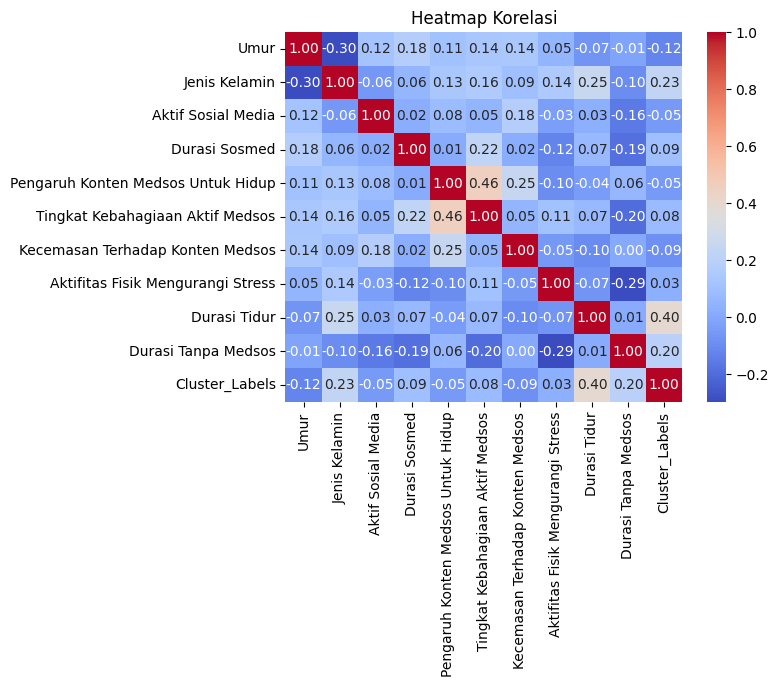

In [ ]:
# Visualisasi deta dengan heatmap
# Membuat heatmap korelasi
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:

# Menentukan variabel dengan korelasi tertinggi terhadap variabel target
target_correlation = corr_matrix['Cluster_Labels'].abs().sort_values(ascending=False)
selected_variables = target_correlation[1:].index.tolist()  # Mengambil semua variabel kecuali target

# Menampilkan variabel yang dipilih
print("Variabel dengan Korelasi Tertinggi terhadap Target:")
print(selected_variables)

Variabel dengan Korelasi Tertinggi terhadap Target:
['Durasi Tidur', 'Jenis Kelamin', 'Durasi Tanpa Medsos', 'Umur', 'Durasi Sosmed', 'Kecemasan Terhadap Konten Medsos', 'Tingkat Kebahagiaan Aktif Medsos', 'Aktif Sosial Media', 'Pengaruh Konten Medsos Untuk Hidup', 'Aktifitas Fisik Mengurangi Stress']


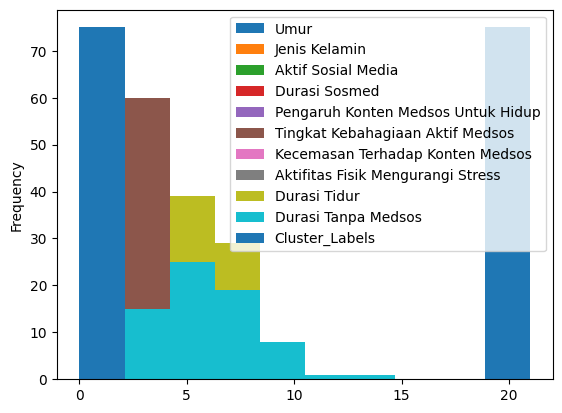

In [ ]:
# visualisasi data dengan histogram
df.plot.hist()
plt.show()

In [ ]:
# Create a single line chart
plt.figure(figsize = (20, 5))
plt.plot(df['Umur'], marker = 'o')
plt.title('Single Line Chart with Random Numbers')
plt.xticks(df.index)
plt.xlabel('Responden ke-')
plt.ylabel('Age')


KeyboardInterrupt: 

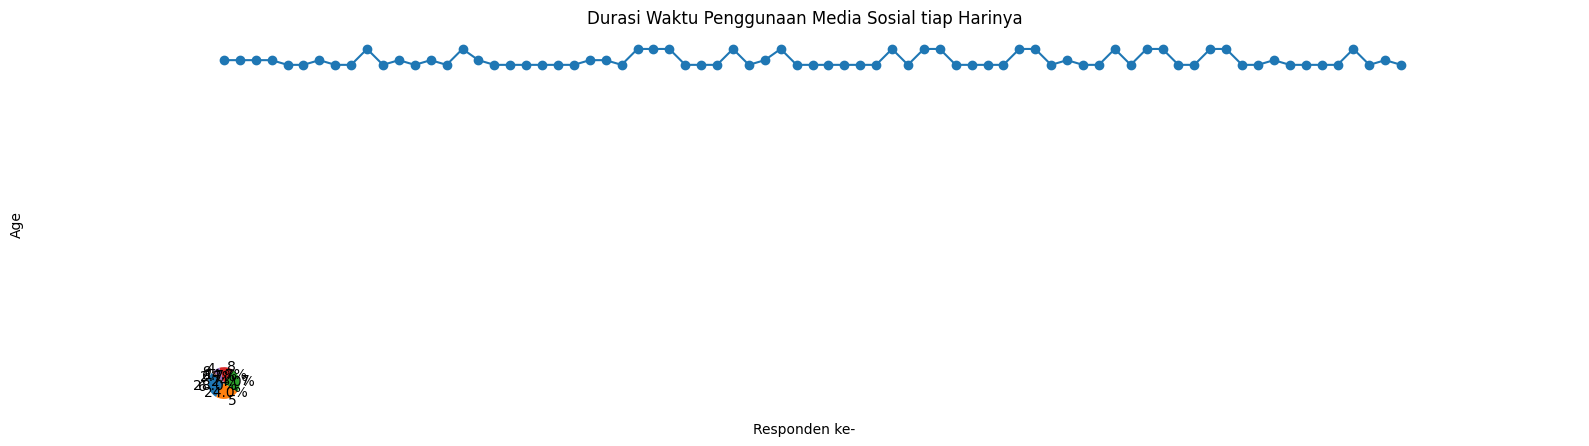

In [ ]:
# durasiMedsos = {
#     'Durasi Media Sosial': result['Berapa durasi tidur Anda tiap harinya? (jam, ex:9)']
# }
# durasi = pd.DataFrame(durasiMedsos)

# Hitung frekuensi setiap nilai
value_counts = df['Durasi Tidur'].value_counts()

# Buat pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Durasi Waktu Penggunaan Media Sosial tiap Harinya")
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran sempurna
plt.show()


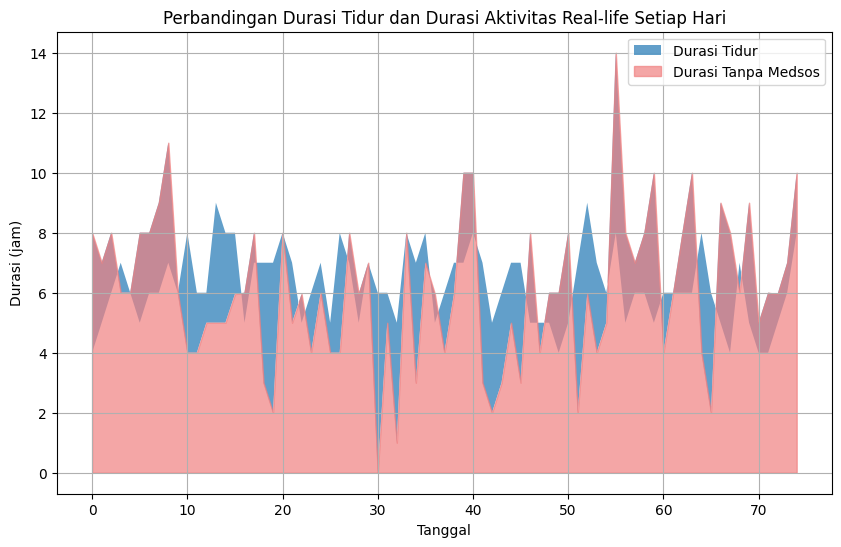

In [ ]:
plt.figure(figsize=(10, 6))  # Atur ukuran gambar (opsional)

plt.fill_between(df.index, df['Durasi Tidur'],df['Durasi Tanpa Medsos'], alpha=0.7, label='Durasi Tidur')
plt.fill_between(df.index, df['Durasi Tanpa Medsos'], color='lightcoral', alpha=0.7, label='Durasi Tanpa Medsos')

plt.xlabel('Tanggal')
plt.ylabel('Durasi (jam)')
plt.title('Perbandingan Durasi Tidur dan Durasi Aktivitas Real-life Setiap Hari')
plt.legend()
plt.grid(True)

plt.show()


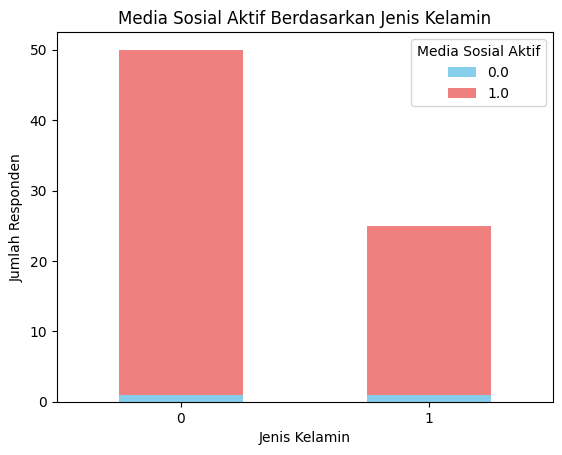

In [ ]:
cross_tab = pd.crosstab(df['Jenis Kelamin'], df['Aktif Sosial Media'])

cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Responden')
plt.title('Media Sosial Aktif Berdasarkan Jenis Kelamin')

plt.legend(title='Media Sosial Aktif', loc='upper right')
plt.xticks(rotation=0)

plt.show()

In [ ]:




# # Contoh data dalam bentuk DataFrame
# data = {
#     # 'Tanggal': result['Timestamp'],
#     'Umur_Mahasiswa':  result['Umur Mahasiswa (angka, ex: 20)'],
#     'Durasi_Tidur': result['Berapa durasi tidur Anda tiap harinya? (jam, ex:9)'],
# }

# # Konversi kolom Tanggal ke tipe data datetime
# df = pd.DataFrame(data)
# df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# # Buat line chart
# plt.figure(figsize=(10, 6))
# plt.plot(df['Tanggal'], df['Umur_Mahasiswa'], label='Umur Mahasiswa', marker='o')
# plt.plot(df['Tanggal'], df['Durasi_Tidur'], label='Durasi Tidur', marker='o')

# plt.xlabel('Tanggal')
# plt.ylabel('Umur / Durasi Tidur (jam)')
# plt.title('Hubungan Antara Umur Mahasiswa dan Durasi Tidur Seiring Waktu')
# plt.legend()
# plt.grid(True)
# plt.show()



In [ ]:
# # Hitung persentase jenis kelamin
# gender_counts = df['Jenis Kelamin'].value_counts()
# total_mahasiswa = len(df)
# percentage_male = (gender_counts['Laki - Laki'] / total_mahasiswa) * 100
# percentage_female = (gender_counts['Perempuan'] / total_mahasiswa) * 100

# # Data aktual
# labels = ['Laki-laki', 'Perempuan']
# sizes = [percentage_male, percentage_female]

# # Buat diagram pie
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# plt.axis('equal')
# plt.title('Distribusi Jenis Kelamin Mahasiswa')

# # Tampilkan diagram pie
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Data contoh dalam bentuk DataFrame
# data = {
#     'Umur Mahasiswa': result['Jenis Kelamin Mahasiswa'],  # Contoh umur antara 18 dan 30 tahun
#     'Durasi Tidur': result['Berapa durasi tidur Anda tiap harinya? (jam, ex:9)'] # Contoh durasi tidur antara 4 dan 10 jam
# }

# scatter = pd.DataFrame(data)

# # Scatterplot
# plt.scatter(scatter['Umur Mahasiswa'], scatter['Durasi Tidur'])
# plt.xlabel('Umur Mahasiswa')
# plt.ylabel('Durasi Tidur (jam)')
# plt.title('Scatterplot: Umur vs. Durasi Tidur')
# plt.show()

In [ ]:
#import dataset
dataReplace = pd.read_csv('data_replace.csv')
dataResult = pd.read_csv('result.csv')
dataKuisioner = pd.read_csv('Kuisioner.csv')
dataFix = pd.concat([dataReplace, dataResult['Cluster_Labels']],  axis=1)
dataMerge = pd.concat([dataKuisioner, dataResult['Cluster_Labels']],  axis=1)

In [ ]:
dataFix.to_csv('dataFix.csv', index=False)
dataMerge.to_csv('KuisionerWithLabel.csv', index=False)